# Compresión de los colores de una imagen con k-means

In [1]:
from PIL import Image
import numpy as np

In [2]:
im = Image.open("foto.jpeg")
type(im)

PIL.WebPImagePlugin.WebPImageFile

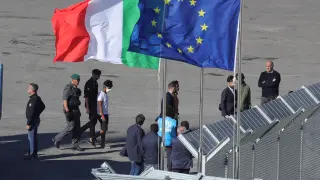

In [3]:
im

In [4]:
X = np.array(im)
X.shape

(180, 320, 3)

In [5]:
X[170,50]

array([29, 38, 55], dtype=uint8)

In [6]:
256**3

16777216

In [7]:
X2 = X.reshape(-1,3)
X2.shape

(57600, 3)

In [8]:
180*320

57600

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)

In [10]:
X_pca.shape

(57600, 2)

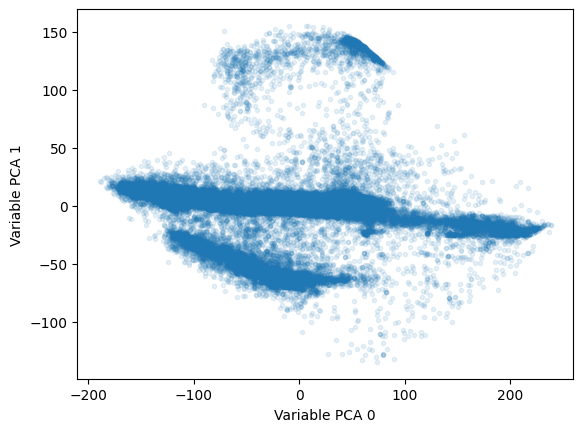

In [11]:
import matplotlib.pyplot as plt

plt.plot(X_pca[:,0], X_pca[:,1], ".", alpha=0.1)
plt.xlabel("Variable PCA 0")
plt.ylabel("Variable PCA 1");

In [12]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from tqdm import tqdm

In [13]:
scores = {}
for k in tqdm(range(2,21)):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X2)
    # labels_ son los clusters asignados a los datos de entrenamiento
    # Equivalente a model.predict(X)
    scores[k] = calinski_harabasz_score(X2, model.labels_)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:54<00:00,  2.85s/it]


In [14]:
scores

{2: 70341.67533014908,
 3: 65923.83809633508,
 4: 71327.9708483038,
 5: 84879.7086623825,
 6: 94738.14882815463,
 7: 95508.45609257964,
 8: 100828.32370661768,
 9: 100618.36852702558,
 10: 103433.03781032286,
 11: 109082.3013872293,
 12: 110560.08013114905,
 13: 112428.2430958354,
 14: 114829.50711953106,
 15: 117656.81975202111,
 16: 118139.71732977201,
 17: 119074.33327298258,
 18: 119288.06741868294,
 19: 116897.02626534458,
 20: 118448.96076734085}

In [15]:
max(scores, key=lambda u:scores[u])

18

In [16]:
model.cluster_centers_

array([[131.48111929, 131.15472502, 131.57591015],
       [ 33.50087839,  36.77454616,  50.82607847],
       [192.12185535, 201.73820755, 216.00628931],
       [ 39.29316547,  59.3057554 , 128.74520384],
       [ 95.22110553, 100.63775399, 106.88551453],
       [245.7278057 ,  80.53936348,  85.39865997],
       [ 74.88310615,  80.02478315,  91.62907889],
       [ 66.00798085,  97.6735834 , 180.53471668],
       [ 55.41468065, 173.607245  , 125.69018112],
       [104.47963801, 186.48868778, 211.13574661],
       [217.31399565, 224.80638144, 242.48875997],
       [174.45528455,  35.83414634,  42.74634146],
       [ 23.88551402,  43.09813084,  96.29517134],
       [146.97856242, 147.89701555, 155.46490122],
       [110.61829653, 115.34994742, 120.05762355],
       [ 56.55215005,  58.56770357,  70.75846295],
       [ 51.1657839 ,  76.62817797, 158.57786017],
       [168.11819235, 172.82618772, 182.9617613 ],
       [139.3283527 , 138.93128574, 138.58531636],
       [ 20.18758142,  20.35214